In [1]:
import jupyter_black

jupyter_black.load()

In [2]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np

from acoustics.constants import primes, speed_of_sound

In [3]:
def qr_sequence(n, p):
    return np.array([i**2 % p for i in range(n + 1)])

In [4]:
qr_sequences = {p: qr_sequence(p, p) for p in primes}

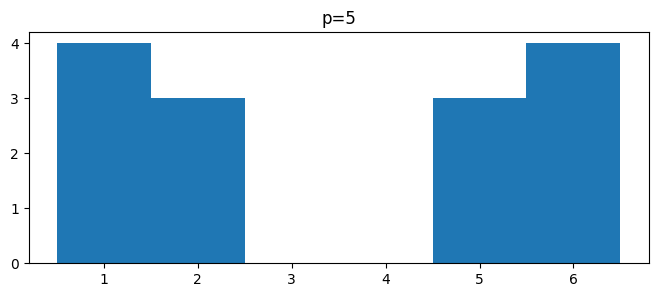

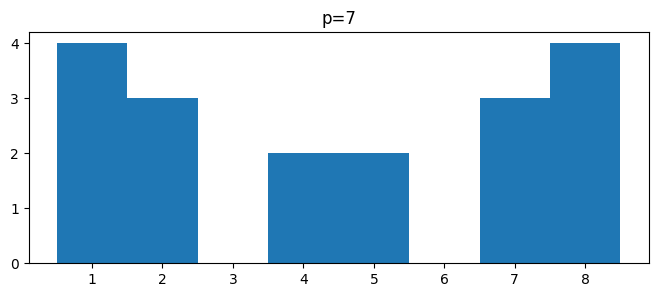

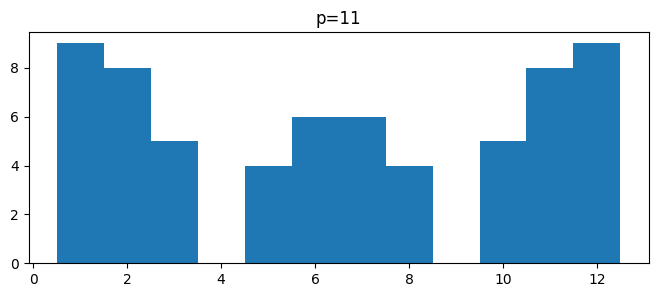

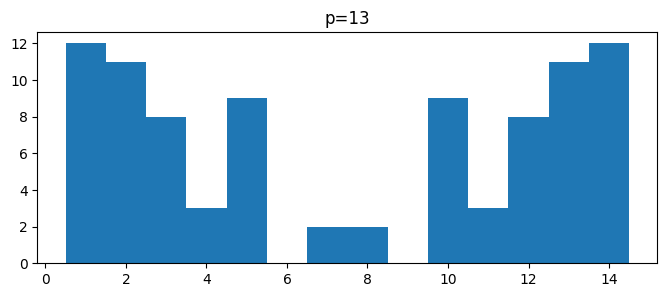

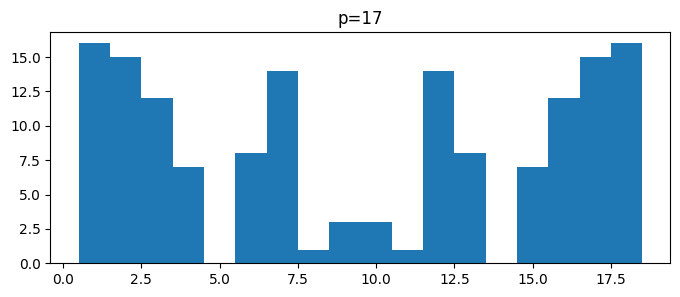

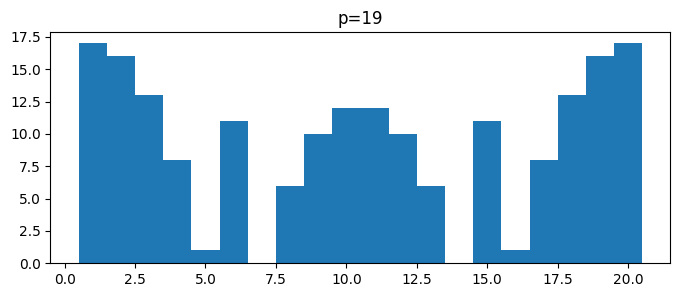

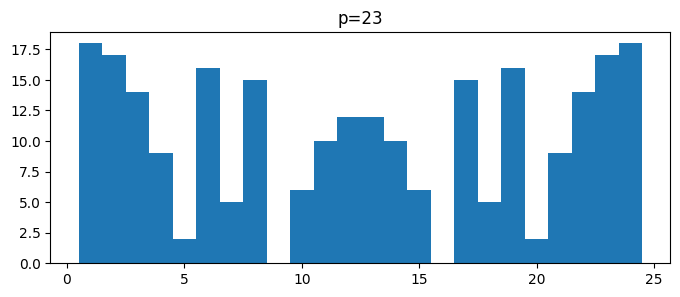

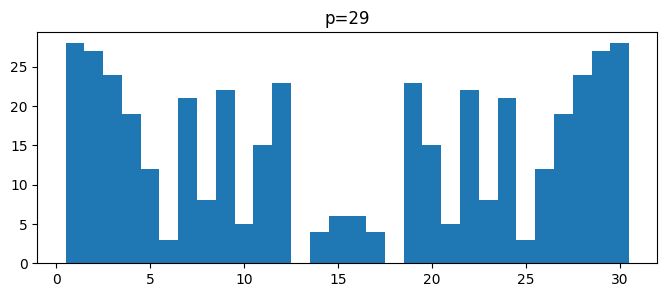

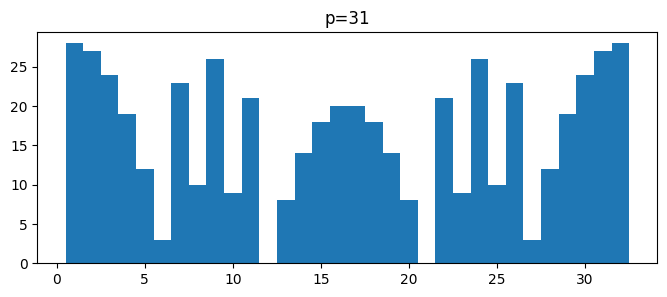

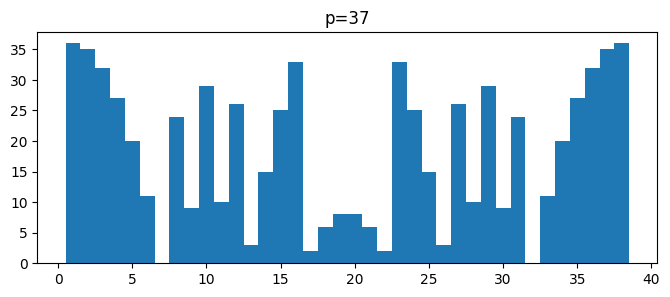

In [5]:
for p, sequence in sorted(qr_sequences.items())[1:11]:
    fig = plt.figure()
    fig.set_figheight(3)
    fig.set_figwidth(8)
    ax = fig.add_subplot()

    M = max(sequence)
    ax.bar(range(1, len(sequence) + 1), M - sequence, width=1.0)
    ax.set_title(f"p={p}")

None

In [6]:
def construct(N, well_width, well_depth, fin_width):
    # Acoustics Absorbers & Difussers 3rd Edition, p 333
    # w = λ_min / 2
    λ_min = 2 * well_width
    f_max = speed_of_sound / λ_min

    # Acoustics Absorbers & Difussers 3rd Edition, p 336
    sequence = qr_sequences[N]
    s_max = max(sequence)
    f_0 = (s_max / N) * (speed_of_sound / (2 * well_depth))

    # Acoustics Absorbers & Difussers 3rd Edition, p 334
    λ_0 = speed_of_sound / f_0
    d_n = (sequence * λ_0) / (2 * N)

    w_total = (N * well_width) + (N * fin_width)

    d_min_listening = λ_0 * 3
    d_min_listening

    M = max(d_n)
    return {
        # params
        "N": N,
        "well_width": well_width,
        "well_depth": well_depth,
        "well_avg_depth": sum(d_n) / N,
        "fin_width": fin_width,
        # results
        "frequency_min": f_0,
        "frequency_max": f_max,
        "wells": d_n,
        "blocks": M - d_n,
        "width": w_total,
    }

## Background

The "design frequency" it's the lowest frequency at which the difusser will operate as deisgned and diffuse. It will have an impact an octave or more below this frequency. It is dictated by the maximum depth of the wells.

The max frequency is the highest frequency at which the diffuser will operate as designed. It is a complex structure and will have an impact scattering frequencies higher than. It is driven by the well width.

Fins are important to the performance of QRD absorbers. The should be as thin as possible while still being rigid to the frequencies involved.

See [Acoustics Absorbers & Difussers 3rd Edition](https://www.amazon.com/Acoustic-Absorbers-Diffusers-Trevor-Cox/dp/0367658410), p333 for more information.

Note, per [Poes Acoustics](https://youtu.be/a2Z9-mGK7QU?si=LGZEu5IaVHl8XN9U&t=504) the critical band for "spaciousness and envelopment" is **1k-5k**. 70-1k is also very important, but most of that is from the recording and placement of speakers, rather than specifics of the room and treatments.

## XPS Foam

Using the Owens Corning "pink" rigid inuslation foam sizes here as it is readily available, cheap, and pretty easy to work with using a [hot wire table](https://www.amazon.com/dp/B0017NS8H6). Fins are 1/8" MDF. Results were good and materials were easy to work with, but the MDF's weight adds up and the overall device is too heavy for the placement. The actual devices will likely use formcore board instead.

This is an example test article created for the Media Room First Reflection Test.

<img src="../images/1d-qrd-foam-side.jpg" width=500/>

<img src="../images/1d-qrd-foam-front.jpg" width=500/>

In [7]:
def fit(available_space, well_width, well_depth, fin_thickness):
    # find the largest N that will fit in the space
    result = None
    for prime in reversed(primes):
        result = construct(prime, well_width, well_depth, fin_thickness)
        if result["width"] <= available_space:
            break

    if result["width"] > available_space:
        print("Unable to find a working solution")
        return None

    print(f"N of {result['N']}")
    print(f"Design frequency {result['frequency_min']:.0f}Hz")
    print(f"Upper frequency {result['frequency_max']:.0f}Hz")
    print(f"Total width is {result['width']:0.3f}m, {result['width'] / 0.0254:0.2f}in")

    width = sum(result["blocks"])
    print(
        f"A width of {width:0.3f}m, {width/0.0254:0.2f}in, in block material will be required"
    )

    width = result["N"] * result["well_depth"]
    print(
        f"A width of {width:0.3f}m, {width/0.0254:0.2f}in, in fin material will be required"
    )

    print("\nConstruction")
    print("2x each of")
    print("    mm     in")
    for i, block in enumerate(sorted(result["blocks"], reverse=True)):
        if i % 2 == 0 and block:
            print(f"{block*1000:6.1f} {block/0.0254:6.2f}")

    print("Layout")
    print("    mm     in")
    for block in result["blocks"]:
        print(f"{block*1000:6.1f} {block/0.0254:6.2f}")

In [8]:
available_space = 30 * 0.0254 - (2 * 0.019)
print(
    f"Available width for treatment {available_space:0.3f}m, {available_space/0.0254:0.2f}in"
)

Available width for treatment 0.724m, 28.50in


## 2" XPS Foam, 5mm Formcore fins, 4" depth

In [9]:
fit(available_space, 0.0254 * 2, 0.0254 * 4, 0.005)

N of 11
Design frequency 1381Hz
Upper frequency 3376Hz
Total width is 0.614m, 24.17in
A width of 0.722m, 28.44in, in block material will be required
A width of 1.118m, 44.00in, in fin material will be required

Construction
2x each of
    mm     in
 101.6   4.00
  90.3   3.56
  67.7   2.67
  56.4   2.22
  45.2   1.78
Layout
    mm     in
 101.6   4.00
  90.3   3.56
  56.4   2.22
   0.0   0.00
  45.2   1.78
  67.7   2.67
  67.7   2.67
  45.2   1.78
   0.0   0.00
  56.4   2.22
  90.3   3.56
 101.6   4.00


## 1" XPS foam, 5mm Foamcore fins, 4" depth

In [10]:
fit(available_space, 0.0254 * 1, 0.0254 * 4, 0.005)

N of 23
Design frequency 1321Hz
Upper frequency 6752Hz
Total width is 0.699m, 27.53in
A width of 1.400m, 55.11in, in block material will be required
A width of 2.337m, 92.00in, in fin material will be required

Construction
2x each of
    mm     in
 101.6   4.00
  96.0   3.78
  90.3   3.56
  84.7   3.33
  79.0   3.11
  67.7   2.67
  56.4   2.22
  50.8   2.00
  33.9   1.33
  28.2   1.11
  11.3   0.44
Layout
    mm     in
 101.6   4.00
  96.0   3.78
  79.0   3.11
  50.8   2.00
  11.3   0.44
  90.3   3.56
  28.2   1.11
  84.7   3.33
   0.0   0.00
  33.9   1.33
  56.4   2.22
  67.7   2.67
  67.7   2.67
  56.4   2.22
  33.9   1.33
   0.0   0.00
  84.7   3.33
  28.2   1.11
  90.3   3.56
  11.3   0.44
  50.8   2.00
  79.0   3.11
  96.0   3.78
 101.6   4.00


## 0.5" XPS foam, 5mm Foamcore fins, 4" depth

In [11]:
fit(available_space, 0.0254 * 0.5, 0.0254 * 4, 0.005)

N of 37
Design frequency 1642Hz
Upper frequency 13504Hz
Total width is 0.655m, 25.78in
A width of 1.981m, 78.00in, in block material will be required
A width of 3.759m, 148.00in, in fin material will be required

Construction
2x each of
    mm     in
 101.6   4.00
  98.8   3.89
  93.1   3.67
  90.3   3.56
  81.8   3.22
  76.2   3.00
  73.4   2.89
  70.6   2.78
  67.7   2.67
  56.4   2.22
  42.3   1.67
  31.0   1.22
  28.2   1.11
  25.4   1.00
  22.6   0.89
  16.9   0.67
   8.5   0.33
   5.6   0.22
Layout
    mm     in
 101.6   4.00
  98.8   3.89
  90.3   3.56
  76.2   3.00
  56.4   2.22
  31.0   1.22
   0.0   0.00
  67.7   2.67
  25.4   1.00
  81.8   3.22
  28.2   1.11
  73.4   2.89
   8.5   0.33
  42.3   1.67
  70.6   2.78
  93.1   3.67
   5.6   0.22
  16.9   0.67
  22.6   0.89
  22.6   0.89
  16.9   0.67
   5.6   0.22
  93.1   3.67
  70.6   2.78
  42.3   1.67
   8.5   0.33
  73.4   2.89
  28.2   1.11
  81.8   3.22
  25.4   1.00
  67.7   2.67
   0.0   0.00
  31.0   1.22
  56.4   2.22


## 2" XPS foam, 1/8" MDF fins, 12" depth

This illistrates the impact of depth on the design frequency, and uses a different fin material for now specific reason.

In [12]:
fit(available_space, 0.0254 * 2, 0.0254 * 12, 0.0254 * 1 / 8)

N of 13
Design frequency 519Hz
Upper frequency 3376Hz
Total width is 0.702m, 27.62in
A width of 2.286m, 90.00in, in block material will be required
A width of 3.962m, 156.00in, in fin material will be required

Construction
2x each of
    mm     in
 304.8  12.00
 279.4  11.00
 228.6   9.00
 203.2   8.00
  76.2   3.00
  50.8   2.00
Layout
    mm     in
 304.8  12.00
 279.4  11.00
 203.2   8.00
  76.2   3.00
 228.6   9.00
   0.0   0.00
  50.8   2.00
  50.8   2.00
   0.0   0.00
 228.6   9.00
  76.2   3.00
 203.2   8.00
 279.4  11.00
 304.8  12.00
